In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv(r"C:\Users\adity\OneDrive\dataset\gld_price_data.csv")

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
df.value_counts()

Date        SPX          GLD         USO        SLV        EUR/USD 
1/10/2008   1420.329956  88.250000   74.019997  16.061001  1.480100    1
5/21/2012   1315.989990  154.649994  35.150002  27.680000  1.281066    1
5/20/2010   1071.589966  115.839996  32.200001  17.350000  1.256708    1
5/20/2013   1666.290039  135.119995  34.439999  22.280001  1.289108    1
5/20/2014   1872.829956  124.690002  37.520000  18.650000  1.370407    1
                                                                      ..
12/30/2010  1257.880005  137.029999  38.119999  29.760000  1.322454    1
12/30/2009  1126.420044  106.930000  39.139999  16.530001  1.434206    1
12/30/2008  890.640015   85.900002   30.200001  10.820000  1.414007    1
12/3/2015   2049.620117  101.760002  12.770000  13.460000  1.061301    1
9/9/2015    1942.040039  106.129997  14.520000  13.930000  1.122070    1
Name: count, Length: 2290, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [23]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[float, int])

# Calculate correlation matrix
corr = df_numeric.corr()
print(corr)


              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<Axes: >

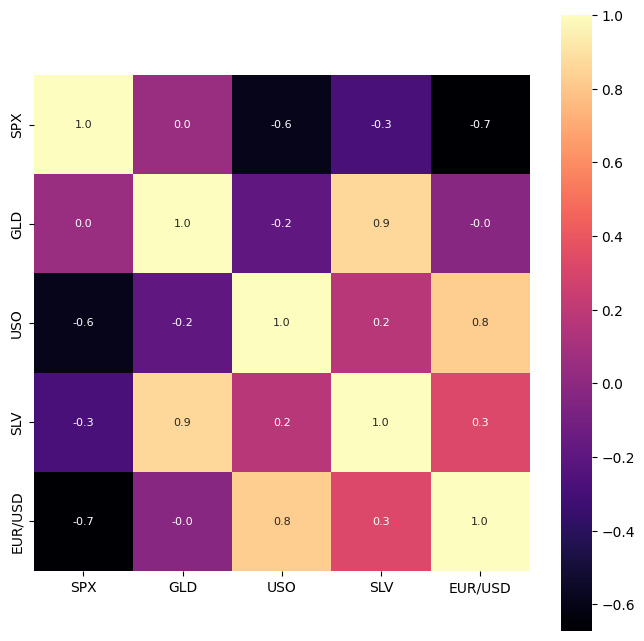

In [24]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='magma')

In [25]:
corr['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

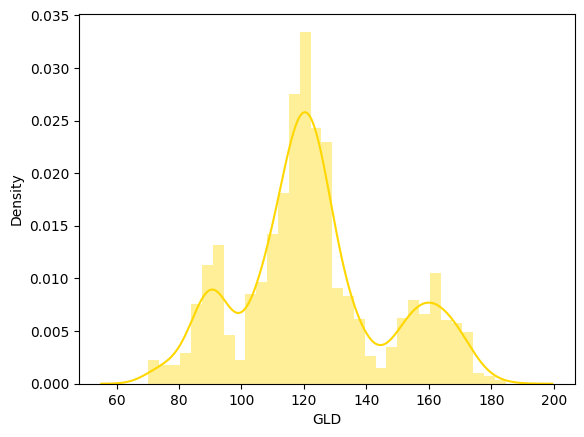

In [32]:
sns.distplot(df['GLD'],color='gold')
plt.show()

In [35]:
x = df.drop(['Date','GLD'], axis=1)
y = df['GLD']

In [36]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [37]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators

In [55]:
# prediction on Test Data
test_data_prediction = model.predict(x_test)

In [44]:
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [46]:
y_pred = model.predict(x_test)

In [49]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 5.9587990910959885
R^2 Score: 0.988702488354275


In [51]:
y_test = list(y_test)

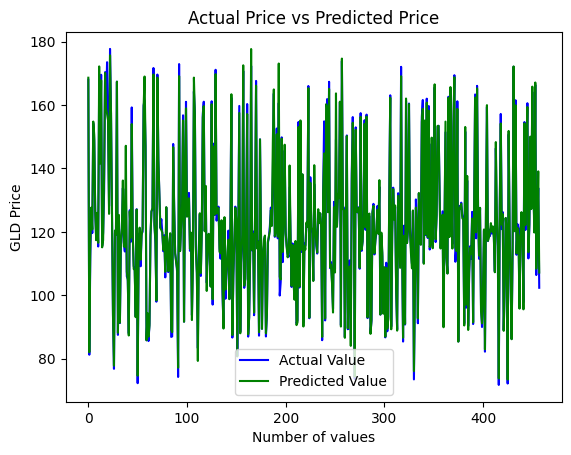

In [61]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()